# 4. Histograms and HSV images

## 4.1 Histograms

You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (*ranging from 0 to 255, not always*) in X-axis and corresponding number of pixels in the image on Y-axis.

### Load images as in previous notebooks

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
image = cv2.imread('imgs/1525979551_607255_1525979631_noticia_normal.jpg')
image_copy = image.copy()
# RGB to BGR
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
# image_RGB = image
image_gray = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'original')

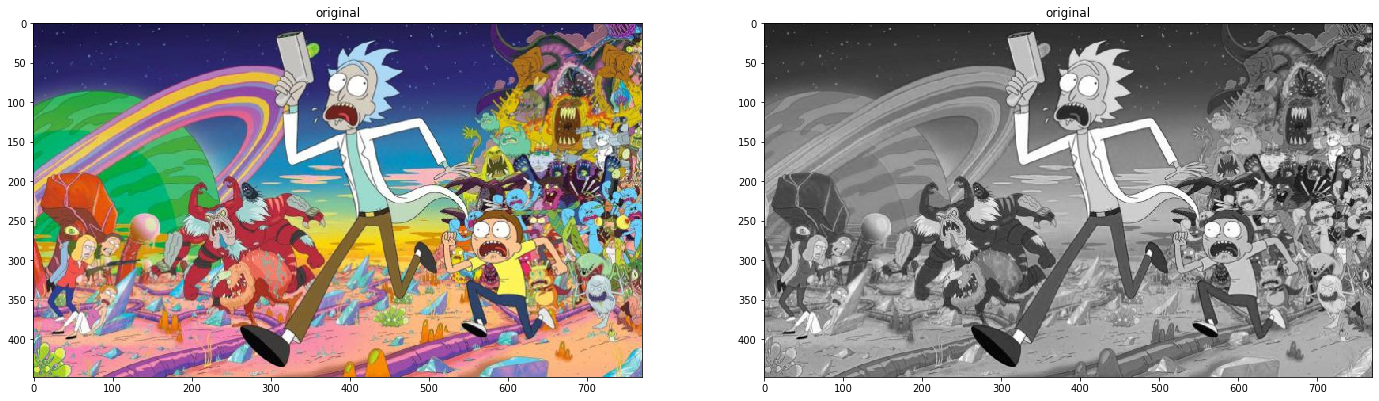

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(24,12))

# Color image
axes[0].imshow(image_RGB)
axes[0].set_title('original')
axes[1].imshow(image_gray, cmap = 'gray')
axes[1].set_title('original')

### Histogram in MatPlotLib

`Matplotlib` has its own histogram function, `hist()`. The function returns all points needed to graph it. 

`histo = cv2.calcHist(image, channel. mask, BINcount, range)`

BINcount : esto representa nuestro conteo de BINS. Necesita ponerse también entre corchetes. Para la escala completa, pasamos [256].

Canales: también se debe poner entre corchetes. Es el índice de canal para el que calculamos el histograma. Por ejemplo, si la entrada es una imagen en escala de grises, su valor es [0]. Para la imagen en color, puede pasar [0], [1] o [2] para calcular el histograma del canal azul, verde o rojo, respectivamente.


Range: Este es el rango de valores que puede tomar cada pixel, normalmente es [0,256].


As we are using RGB in the original picture, remember it is formed by 3 matrix(R,G and B), and 
 histograms, one for each channel, are needed.



Text(0.5, 1.0, 'BGR hist')

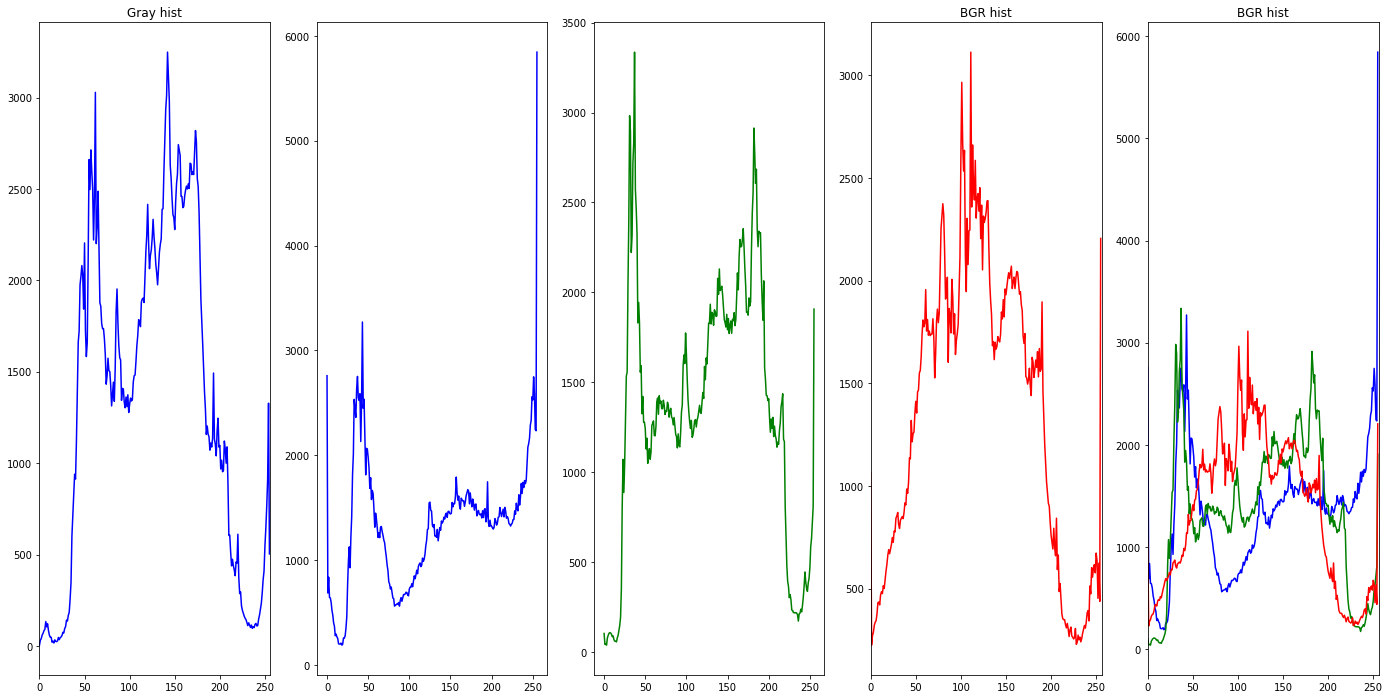

In [17]:
# create figure
fig, axes = plt.subplots(1, 5, figsize=(24, 12))

# Obtain the histogram and store it in a variable. 
histo = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
axes[0].plot(histo, color = 'b') # Select the graph color
axes[0].set_title('Gray hist')
axes[0].axis(xmin=0, xmax=256)


# With a loop, make one histogram for each channel and graph it with the proper color
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image_BGR], [i], None, [256], [0, 256])
    axes[i+1].plot(histr, color = col)
axes[i+1].axis(xmin=0, xmax=256)
axes[i+1].set_title('BGR hist')


for i,col in enumerate(color):
    histr = cv2.calcHist([image_BGR], [i], None, [256], [0, 256])
    axes[4].plot(histr, color = col)
axes[4].axis(xmin=0, xmax=256)
axes[4].set_title('BGR hist')



### Histogram equalization

For good segmentation, images with high contrast are preferable. Histogram can be equalized for that.


[]

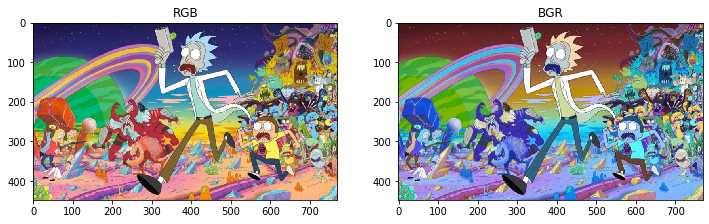

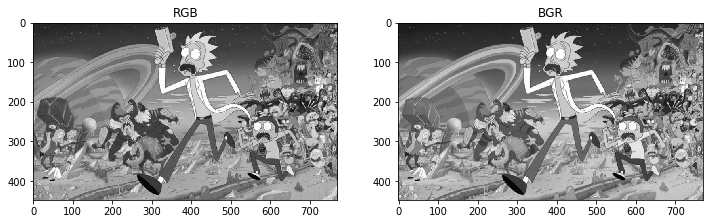

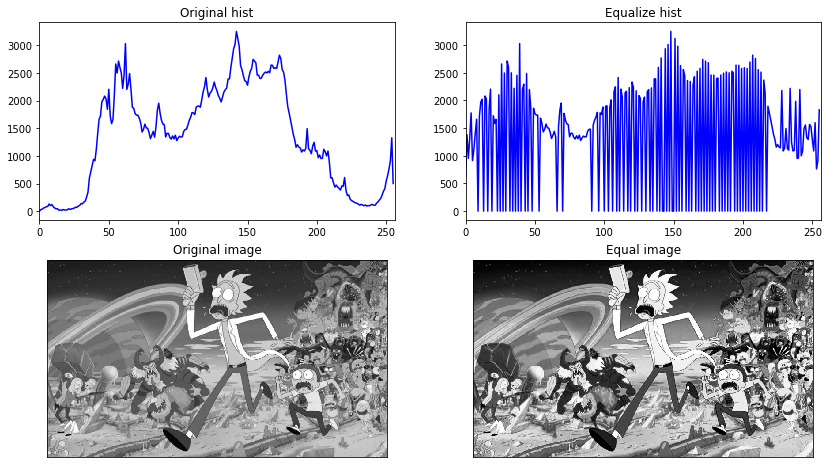

In [31]:
image = cv2.imread('imgs/1525979551_607255_1525979631_noticia_normal.jpg')
image_copy = image.copy()

image_RGB = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB) # RGB to BGR
#Por que es lo mismo BGR2RGB que RGB2BGR
image_gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
image_gray_RGB = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1,2, figsize=(12,12))
axes[0].imshow(image_RGB)
axes[0].set_title('RGB')
axes[1].imshow(image_copy)
axes[1].set_title('BGR')

fig, axes = plt.subplots(1,2, figsize=(12,12))
axes[0].imshow(image_gray_RGB, cmap = "gray")
axes[0].set_title('RGB')
axes[1].imshow(image_gray, cmap = "gray")
axes[1].set_title('BGR')

histr = cv2.calcHist([image_gray_RGB], [0], None, [256], [0,256])

# Equalized hist This image should have more contrast
equal_image = cv2.equalizeHist(image_gray_RGB)
equal_histr = cv2.calcHist([equal_image], [0], None, [256], [0,256])


# Representation
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axes[0][0].plot(histr,color = 'b')
axes[0][0].set_title('Original hist')
axes[0][0].axis(xmin=0, xmax=256)

axes[0][1].plot(equal_histr, color = 'b')
axes[0][1].set_title('Equalize hist')
axes[0][1].axis(xmin=0, xmax=256)

axes[1][0].imshow(image_gray, cmap='gray')
axes[1][0].set_title('Original image')
axes[1][1].imshow(equal_image, cmap='gray')
axes[1][1].set_title('Equal image')

axes[1][0].set_xticks([])
axes[1][0].set_yticks([])
axes[1][1].set_xticks([])
axes[1][1].set_yticks([])

## HSV 

HSV stands fore Hue Saturation Value. It is also called HSB (Hue Saturation Brightness).

**values**
* H:  0-179
* S:  0-255
* V:  0-255

**_Advantages_**: HSV separates color in one channel (matrix), H. This is as huge advantage coming from RGB that color is a mix of the 3 matrices.


Text(0.5, 1.0, 'Value channel')

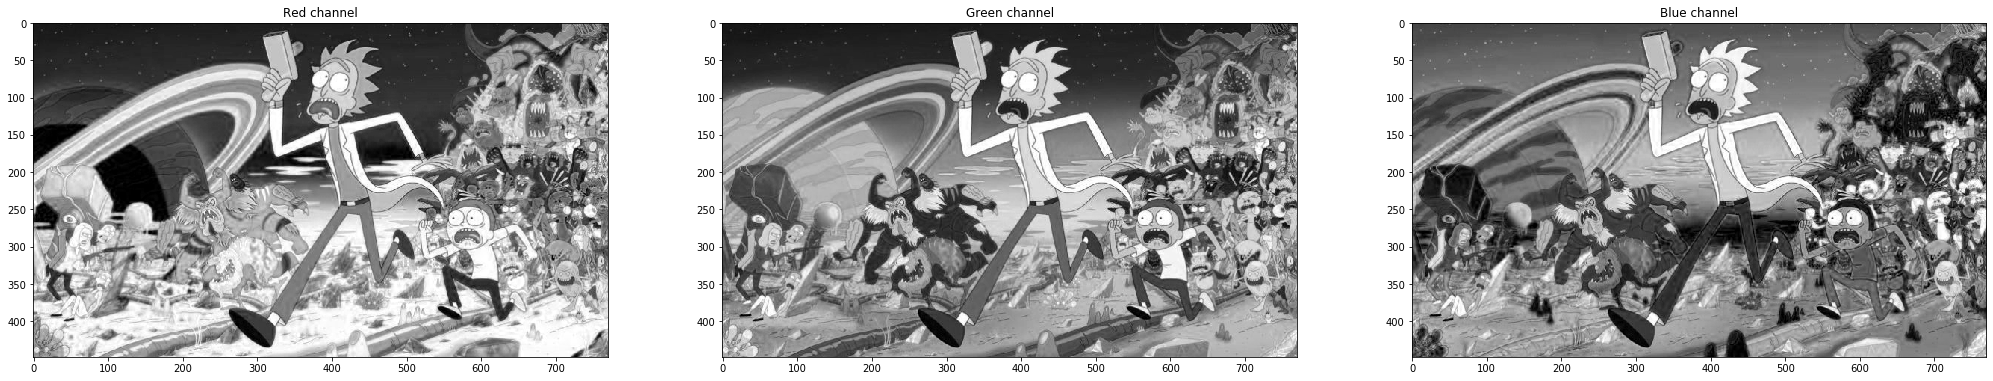

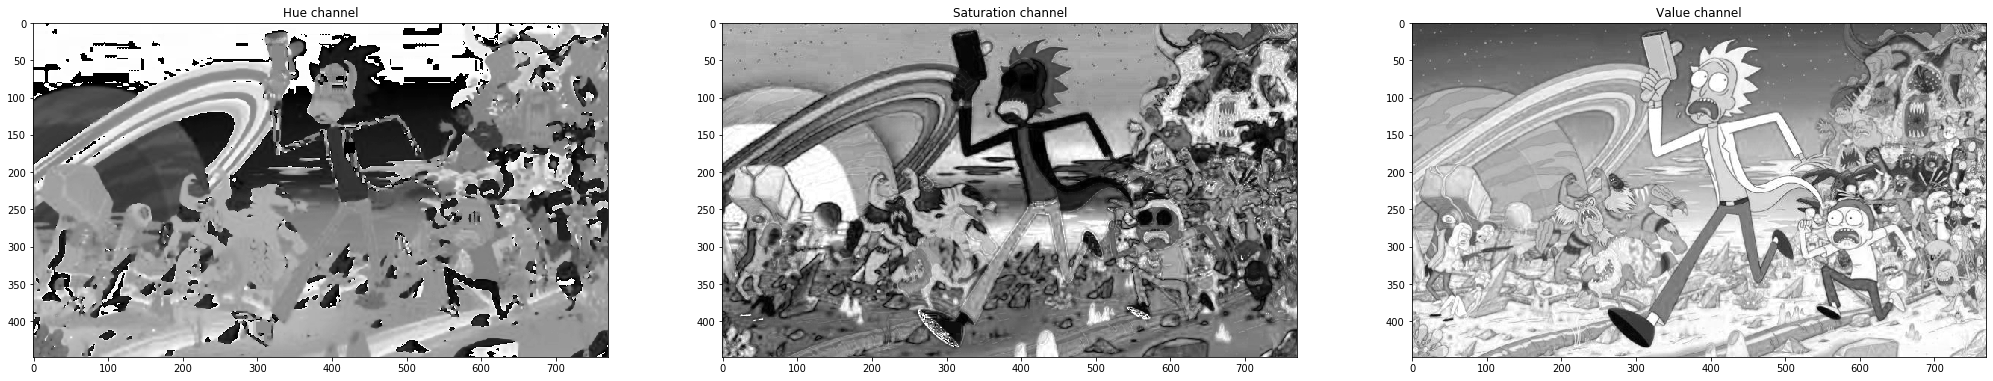

In [38]:
image = cv2.imread('imgs/1525979551_607255_1525979631_noticia_normal.jpg')
image_copy = image.copy()
image_RGB = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB) 


hsv = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2HSV)
fig, axes = plt.subplots(1, 3, figsize=(35, 35))


axes[0].imshow(image_RGB[:, :, 0],cmap='gray')
axes[0].set_title('Red channel')
axes[1].imshow(image_RGB[:, :, 1], cmap='gray')
axes[1].set_title('Green channel')
axes[2].imshow(image_RGB[:, :, 2],cmap='gray')
axes[2].set_title('Blue channel')


    
    
fig, axes = plt.subplots(1,3, figsize=(35, 35))
axes[0].imshow(hsv[:, :, 0], cmap='gray')
axes[0].set_title('Hue channel')
axes[1].imshow(hsv[:, :, 1], cmap='gray')
axes[1].set_title('Saturation channel')
axes[2].imshow(hsv[:, :, 2], cmap='gray')
axes[2].set_title('Value channel')



## ROI - Region Of Interest 

It is time to talk about ROI, Region Of Interest.

Sometimes, we will like to extract just a part of an image, determined by its color, shape...

In the next block, It is showed how to extract the blue color from our original BGR picture.

**Steps to follow**:
1. Take blue channel (matrix) from BGR picture and aply a filter to it. It will be the Mask.
2. Apply `bitwise_and` to BGR picture using blue channel filtered as mask.
3. Show masked image.

**_NOTE:_** It is performed  using BGR. Later (jut after this next block) it will be showed how it is done with HSV.


We will try to extract only the blue color (blue jacket color).

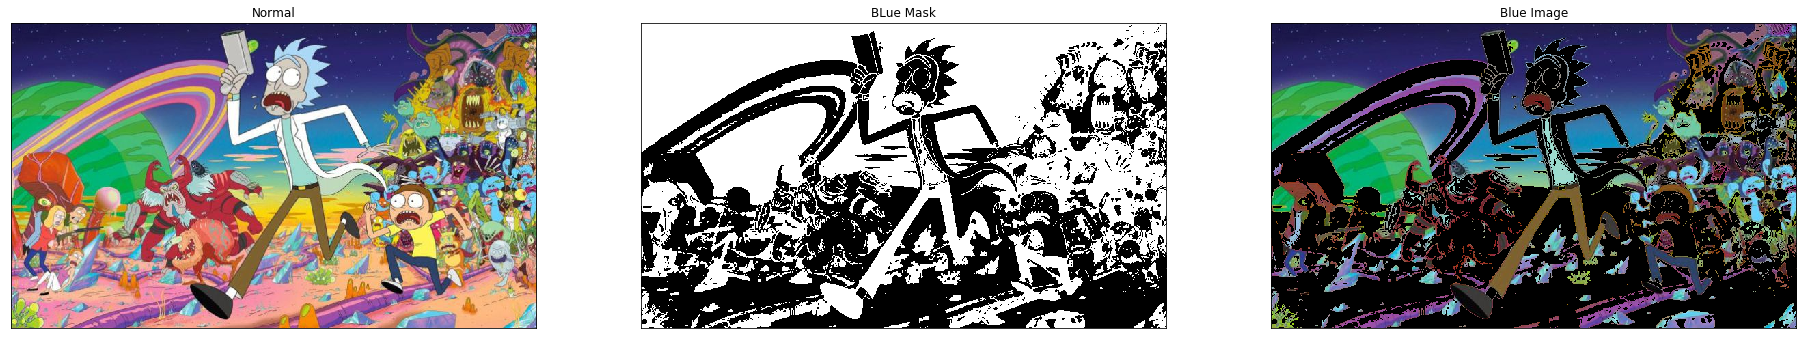

In [56]:
# take blue channel pixels with values between 0 and 150
image = cv2.imread('imgs/1525979551_607255_1525979631_noticia_normal.jpg')
image =  cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
mask_blue = cv2.inRange(image[:,:,0], 0, 160) 

img_blue = cv2.bitwise_and(image,image,mask = mask_blue)
    
# Plot images    
fig, axes = plt.subplots(1,3, figsize=(32, 32))
axes[0].imshow(image)
axes[0].set_title("Normal")
axes[1].imshow(mask_blue , cmap='gray')
axes[1].set_title('BLue Mask')
axes[2].imshow(img_blue)
axes[2].set_title('Blue Image')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

#Si nos fijamos, el pelo no lo reconoce como azul


### PROBLEM

It is so difficult to select a specific color because there is no "*spatial separation*" in RGB. So the resulting image is showing blue color but, also it shows purple and green.


Now, it will be perfomed using HSV as there is  "*spatial separation*" meaning that there is a lineal relationship between color, following the same steps as before:

(100, 225, 255)


Text(0.5, 1.0, 'Segmented')

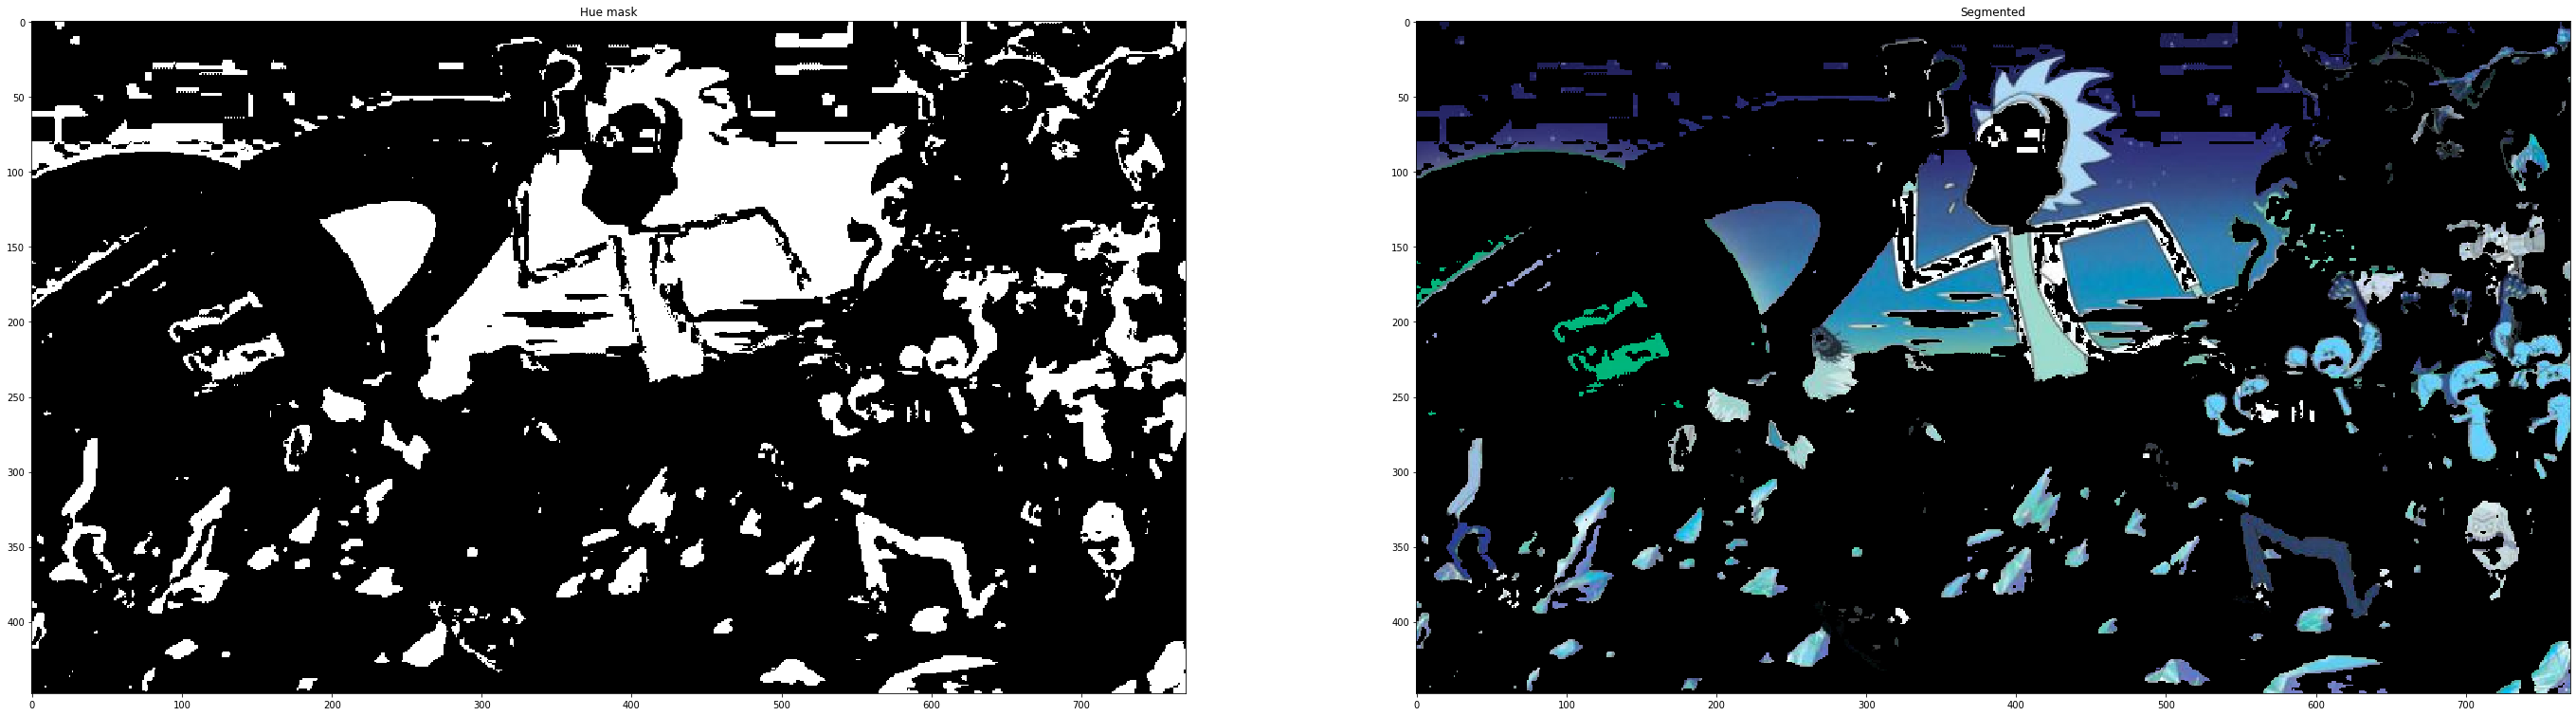

In [76]:
# We can obtain the HSV value picking one BGR color and using hsv transformation
def rgb2hsv(r, g, b):
  rgb = np.uint8([[[r, g, b]]])
  hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
  return int(hsv[0][0][0]), int(hsv[0][0][1]), int(hsv[0][0][2])
        
hsv_value = rgb2hsv(30,177,255)
print (hsv_value)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue = hsv[:,:,0]
maskHSV = cv2.inRange(hue, 0, 40)
color_filtred = cv2.bitwise_and(image_BGR, image_BGR, mask = maskHSV) 

# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(48, 48))
axes[0].imshow(maskHSV,cmap = 'gray')
axes[0].set_title('Hue mask')
axes[1].imshow(color_filtred)
axes[1].set_title('Segmented')

It is possible to see how accurate it is. It allow us to color pick any color, which is extremely useful.